In [1]:
%matplotlib inline

from tabula import read_pdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_data():
    data_columns = ['Campus',
                    'Name',
                    'Job Title',
                    'FTE',
                    'Annual Base Pay']
    df_read = read_pdf('data/usnh_salary_book_2018.pdf',
                       pages='all',
                       pandas_options={'header': None})

    df_read.columns = data_columns

    print('Data dimension:', df_read.shape)
    df_read.to_csv('data/usnh_salary_book_2018_extracted.csv', index=False)
    return df_read


In [3]:
def salaries_individuals(roster):
    roster_joined = '|'.join(roster).lower()
    salaries = df.loc[df['Name'].str.lower().str.contains(roster_joined)].sort_values(by='Annual Base Pay', ascending=False)
    display(salaries)
    return salaries

Read data:

In [4]:
# df = extract_data()
df = pd.read_csv('data/usnh_salary_book_2018_extracted.csv')
display(df)
df.info()

,Campus,Name,Job Title,FTE,Annual Base Pay
0,GSC,"Acheson, Lisa M",FINANCIAL AID OFFICER II,1.0,"$50,120.00"
1,GSC,"Acker, Joy J","DIR, ADMISSIONS OPERATIONS-GSC",1.0,"$62,000.00"
2,GSC,"Acker, Katherine E",ACADEMIC ADVISOR-GSC,1.0,"$47,920.00"
3,GSC,"Aiton, Shannon E",PROGRAM SUPPORT ASSISTANT-GSC,1.0,"$37,050.00"
4,GSC,"Ambrose-Anderson, Alaya D",ASSISTANT REGISTRAR,1.0,"$47,920.00"
5,GSC,"Antonellis, Paul J",SENIOR LECTURER-CONTRACT FACUL,1.0,"$64,700.00"
6,GSC,"Argeropoulos, Bonnie D",ACADEMIC ADVISOR-GSC,1.0,"$48,400.00"
7,GSC,"Barnes, Kathleen Shirley",COMMUNICATION INFO SPEC II,1.0,"$59,720.00"
8,GSC,"Beauchemin, Carole D","VPST-UNDGRD,STDS,CC&ML,AI",1.0,"$98,930.00"
9,GSC,"Bixby, Crystal M",SR BUSINESS SERVICES ASST,1.0,"$40,788.80"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 5 columns):
Campus             4293 non-null object
Name               4293 non-null object
Job Title          4293 non-null object
FTE                4293 non-null float64
Annual Base Pay    4293 non-null object
dtypes: float64(1), object(4)
memory usage: 167.8+ KB


Do some **preprocessing**!

In [5]:
df['Annual Base Pay'] = df['Annual Base Pay'].apply(lambda x: x.lstrip('$').replace(',', ''))
df['Annual Base Pay'] = df['Annual Base Pay'].astype(float)

The most frequent job title:

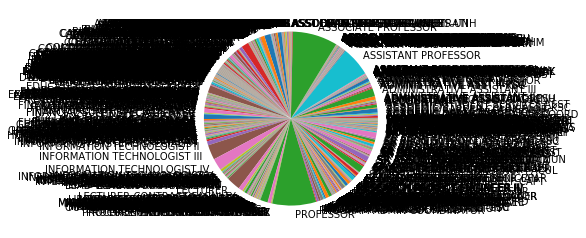

In [6]:

df.groupby(by='Job Title').count().sort_values(['Campus'], ascending=False)
plt.figure()
df.groupby(by='Job Title').count()['Campus'].plot(kind='pie')
plt.show()


The **highest salary** among **the New Hampshire universities**:

In [7]:
max_salary = df['Annual Base Pay'].max()
max_salary_idx = df['Annual Base Pay'].idxmax()
display(df.iloc[max_salary_idx])

Campus                            UNH
Name               Dean, James Warren
Job Title             PRESIDENT - UNH
FTE                                 1
Annual Base Pay                445000
Name: 1826, dtype: object

The top 20 highest and lowest salaries:

In [8]:
salaries_sorted = df.sort_values(by=['Annual Base Pay'], ascending=False)
highest_salaries = salaries_sorted.iloc[0:20]
lowest_salaries = salaries_sorted.iloc[-20:]
print('Highest salaries:')
display(highest_salaries)
print('Lowest salaries:')
display(lowest_salaries)

Highest salaries:


,Campus,Name,Job Title,FTE,Annual Base Pay
1826,UNH,"Dean, James Warren",PRESIDENT - UNH,1.0,445000.0
2491,UNH,"Huddleston, Mark W",ACADEMIC ADMINISTRATOR,1.0,425000.0
662,PSU,"Birx, Donald L",PRESIDENT - PSU,1.0,340000.0
2575,UNH,"Jones, Wayne E",INTERIM PROVOST & VP ACAD AFFS,1.0,340000.0
3883,UNH,"Targett, Nancy M",PROVOST&VP ACAD AFFAIRS-UNH,1.0,340000.0
4258,USNH,"Leach, Todd J",CHANCELLOR,1.0,325000.0
1954,UNH,"Dutton Cox, Deborah",VP ADVANCEMENT-UNH,1.0,322000.0
3078,UNH,"Merrill-Sands, Deborah M",DEAN - PAUL COLLEGE,1.0,315240.0
1684,UNH,"Clement, Christopher D",VP FINANCE & ADMIN UNH,1.0,300000.0
1578,UNH,"Carpenter, Megan M",DEAN OF UNH SCHOOL OF LAW,1.0,290000.0


Lowest salaries:


,Campus,Name,Job Title,FTE,Annual Base Pay
3830,UNH,"Stewart, Kevin P",FOOD SERVICE ASSISTANT,0.77,21392.0
1305,UNH,"Baumer, Matthew E",COOK I,0.77,21296.0
3495,UNH,"Reyes, Yokasta Y",FOOD SERVICE ASSISTANT,0.77,21120.0
2524,UNH,"James, Alice I",COOK I,0.76,20960.0
3947,UNH,"Trent, Rick B",FOOD SERVICE ASSISTANT,0.77,20944.0
2275,UNH,"Grevich, Darlene J",BAKER I,0.77,20928.0
3561,UNH,"Rovelto, David S",FOOD SERVICE ASSISTANT,0.77,20896.0
1983,UNH,"Ellis, Colby B",COOK I,0.76,20800.0
1782,UNH,"Cruz Chalas, Teresa D",FOOD SERVICE ASSISTANT,0.77,20624.0
3541,UNH,"Rogers, Melinda S",FOOD SERVICE ASSISTANT,0.77,20608.0


Some stats

In [9]:
print('Average Salary:')
display(df['Annual Base Pay'].mean())
print('Mode:')
display(df['Annual Base Pay'].mode())
print('Median:')
display(df['Annual Base Pay'].median())

Average Salary:


72537.98904961566

Mode:


0    70000.0
dtype: float64

Median:


65430.0

-------
Top 20 and bottom 20 Professors' salaries:

In [10]:
prof_salaries = df.loc[df['Job Title'].str.lower().str.contains('professor')].sort_values(by='Annual Base Pay', ascending=False)
prof_top20 = prof_salaries.iloc[0:20].reset_index()
prof_bottom20 = prof_salaries.iloc[-20:].reset_index()
display(prof_top20)
display(prof_bottom20)



,index,Campus,Name,Job Title,FTE,Annual Base Pay
0,2261,UNH,"Greenberg, Arthur",PROFESSOR,1.00,212650.0
1,2511,UNH,"Innis, Daniel E",PROFESSOR,1.00,199380.0
2,2746,UNH,"Lashmore, David S",RESEARCH PROFESSOR,1.00,199240.0
3,2988,UNH,"Mayer, Larry A",PROFESSOR,1.00,191770.0
4,1958,UNH,"Dwyer, Joseph Richard",PROFESSOR,1.00,188690.0
5,1169,UNH,"Aber, John D",PROFESSOR,1.00,180970.0
6,2013,UNH,"Etebari, Ahmad",PROFESSOR,1.00,179870.0
7,3380,UNH,"Pillemer, David B",PROFESSOR,0.88,179680.0
8,2292,UNH,"Gruen, Thomas W",PROFESSOR,1.00,177530.0
9,2377,UNH,"Hasseldine, David J",PROFESSOR,1.00,177440.0


,index,Campus,Name,Job Title,FTE,Annual Base Pay
0,1875,UNH,"Dillon, Ann E",CLINICAL ASSISTANT PROFESSOR,0.70,55780.0
1,2459,UNH,"Hollis, Eileen H",CLINICAL ASSISTANT PROFESSOR,1.00,55330.0
2,506,KSC,"Salcetti, Marianne",ASSISTANT PROFESSOR,0.75,54280.0
3,1488,UNH,"Browne, Gretchen S",CLINICAL ASSISTANT PROFESSOR,0.88,54000.0
4,1354,UNH,"Berenguier, Nadine S",PROFESSOR,0.50,53240.0
5,3972,UNH,"Tutko, Holly A",CLINICAL ASSISTANT PROFESSOR,0.60,52470.0
6,3700,UNH,"Shiklomanov, Alexander I",RESEARCH ASSISTANT PROFESSOR,0.75,51240.0
7,2151,UNH,"Gardner, James V",RESEARCH PROFESSOR,0.50,50110.0
8,2082,UNH,"Flippo, Tara R",CLINICAL ASSISTANT PROFESSOR,1.00,49490.0
9,3010,UNH,"McCurdy, Kathryn J",CLINICAL ASSISTANT PROFESSOR,0.88,49310.0


In [12]:
cs_names = ['Hatcher', 'Ruml',
            'Bartos', 'Petrik', 'Varki', 'Charpentier',
            'Dietz', 'Begum', 'Xu, Dongpeng' 'Weiner, James', 'Valcourt, Scott',
            'Narayan', 'Magnusson', 'Hausner', 'Graf, Ken', 'Gildersleeve',
            'Coleman, Betsy', 'Bochert', 'Plumlee', 'Lemon',
            'Kibler', 'Kitterman', 'Desmarais']
cs_salaries = salaries_individuals(cs_names)

oiss_names = ['Webber, Elizabeth', 'Chiarantona']
oiss_salaries = salaries_individuals(oiss_names)

temp_names = ['Lyon, Mark', 'Macmanes']
temp_salaries = salaries_individuals(temp_names)


,Campus,Name,Job Title,FTE,Annual Base Pay
2380,UNH,"Hatcher, Philip John",PROFESSOR,1.00,163340.0
1296,UNH,"Bartos, Radim",PROFESSOR,1.00,149460.0
4006,UNH,"Varki, Elizabeth",ASSOCIATE PROFESSOR,1.00,141530.0
3574,UNH,"Ruml, Wheeler",PROFESSOR,1.00,141150.0
1633,UNH,"Charpentier, Michel H",ASSOCIATE PROFESSOR,1.00,131950.0
3990,UNH,"Valcourt, Scott A","DIR, IT STRATEGIC TECHNOLOGY",1.00,129550.0
1853,UNH,"Desmarais, Gina L",INFORMATION TECHNOLOGIST IV,1.00,112430.0
2665,UNH,"Kitterman, Scott T",INFORMATION TECHNOLOGIST IV,1.00,107180.0
2188,UNH,"Gildersleeve, A Michael",PRINCIPAL LECTURER,1.00,107050.0
1871,UNH,"Dietz, Laura M",ASSISTANT PROFESSOR,1.00,96390.0


,Campus,Name,Job Title,FTE,Annual Base Pay
4063,UNH,"Webber, Elizabeth R","ASSOCIATE DIRECTOR, OISS",1.0,64400.0
1652,UNH,"Chiarantona, Paul M",COORD-SPECIAL STUDENT PROG,1.0,47000.0


,Campus,Name,Job Title,FTE,Annual Base Pay
2879,UNH,"Lyon, Mark E",ASSOCIATE PROFESSOR,1.0,101990.0
2893,UNH,"Macmanes, Matthew D",ASSISTANT PROFESSOR,1.0,95000.0


--------
Find the name you're looking for:

In [18]:
desired = salaries_individuals(['kun'])

,Campus,Name,Job Title,FTE,Annual Base Pay
2696,UNH,"Kun, Andrew L",ASSOCIATE PROFESSOR,1.0,127050.0
377,KSC,"Kundanis, Rose Marie",PROFESSOR,1.0,103580.0
